# Feature Engineering on per-character TF-IDF

font: https://github.com/gouravbarkle/Password-Strength-Classifier/tree/main

**Feature Extraction**: Passwords are textual data, so we'll need to convert them into numerical features, such as **TF-IDF** 

In [33]:
import pandas as pd
# For text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
file = r"cleaned_data.csv"
df = pd.read_csv(file, low_memory=False)

In [35]:
df.dropna(subset=['Password'], inplace=True)

In [36]:
# TF-IDF of each sample's carachter 
psw = df['Password'].values
vec = TfidfVectorizer(analyzer='char')
X = vec.fit_transform(psw)
tfidf_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out(), index=df.index)
# Merge the original DataFrame with the TF-IDF DataFrame based on indices
merged_df = df.join(tfidf_df)
merged_df

,Password,Strength,,!,"""",#,$,%,&,(,...,ÿ,œ,ƒ,—,‚,‡,…,‹,›,™
0,kzde5577,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,kino3434,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,visi7k1yr,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,megzy123,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,lamborghin1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669839,10redtux10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669840,infrared1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669841,184520socram,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669842,marken22a,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Now apply the models

**Model Training**: Once yo we've prepared our dataset and converted passwords into numerical features, we can train the k-NN model using this data.


## k-NN

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [38]:
# Extract features (X) and target variable (y)
X, y = (merged_df.drop(["Password","Strength"], axis=1), merged_df["Strength"])
print(X.shape)
print(y.shape)

(669843, 120)
(669843,)


In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [16]:
# trying to understand which hyperparameter is the best
scores = {}
# for n_n in range(3, 36, 4):
for n_n in range(13, 34, 4):
    
    # instantiate the model: the k-NN classifier
    model_knn = KNeighborsClassifier(n_neighbors=n_n)

    # fit the model to our data
    model_knn.fit(X_train, y_train)

    # predict on new data
    y_model = model_knn.predict(X_test)

    scores[n_n] = accuracy_score(y_test, y_model)

print(scores)

# 31 min

{13: 0.794907777172331, 17: 0.7964043920608499, 21: 0.7968037381782352, 25: 0.7966880397703946, 29: 0.7963446767535773, 33: 0.7959042763624421}



- accuracy score with ```n_neighboors = 3```: $0.7569698960207212$
- accuracy score with ```n_neighboors = 5```: $0.7765565168061268$
- accuracy score with ```n_neighboors = 7```: $0.7854652942098546$
- accuracy score with ```n_neighboors = 9```: $0.7902761086520016$
- accuracy score with ```n_neighboors = 11```: $0.793530592898357$

final score dictionary: {13: 0.794907777172331, 17: 0.7964043920608499, 21: 0.7968037381782352, 25: 0.7966880397703946, 29: 0.7963446767535773, 33: 0.7959042763624421, 3: 0.7569698960207212, 5: 0.7765565168061268, 7: 0.7854652942098546, 9: 0.7902761086520016, 11: 0.793530592898357}



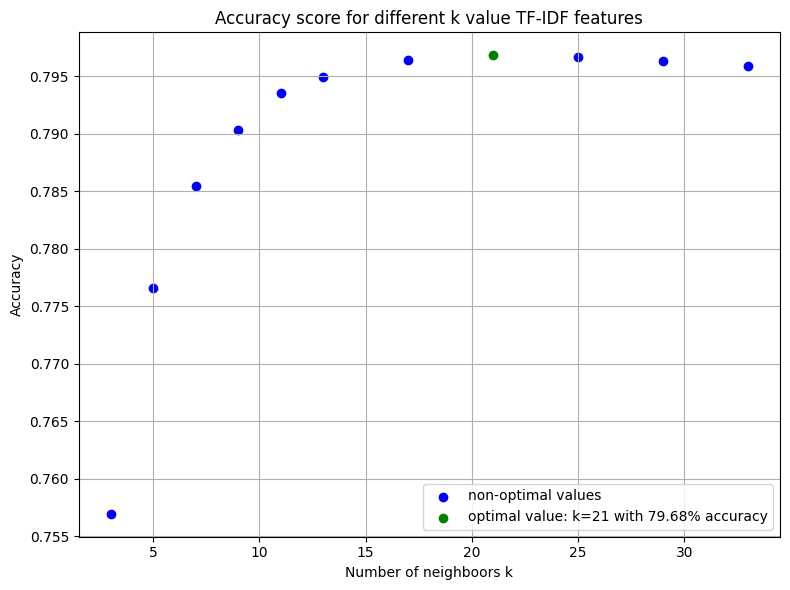

In [41]:
scores[3] = 0.7569698960207212
scores[5] = 0.7765565168061268
scores[7] = 0.7854652942098546
scores[9] = 0.7902761086520016
scores[11] = 0.793530592898357

keys = list(scores.keys())
values = list(scores.values())

# Find maximum value of accuracy and its corresponding k
max_value = max(values)
max_key = keys[values.index(max_value)]

# Plotting the trend of the accuracy for different values of k
plt.figure(figsize=(8,6))
plt.scatter([key for key in keys if key != max_key], [val for val in values if val != max_value], color='blue', label='non-optimal values')
plt.scatter(max_key, max_value, color='green', label=f'optimal value: k={max_key} with {(max_value*100).round(2)}% accuracy')
plt.legend()
plt.xlabel('Number of neighboors k')
plt.ylabel('Accuracy')
plt.title('Accuracy score for different k value TF-IDF features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
#n_n = max_key
n_n = 21
# instantiate the model: the k-NN classifier
model_knn = KNeighborsClassifier(n_neighbors=n_n)

# fit the model to our data
model_knn.fit(X_train, y_train)

# predict on new data
y_model = model_knn.predict(X_test)

# Evaluating the model
accuracy_score(y_test, y_model)

0.7968037381782352

confusion matrix

Text(77.92222222222227, 0.5, 'true value')

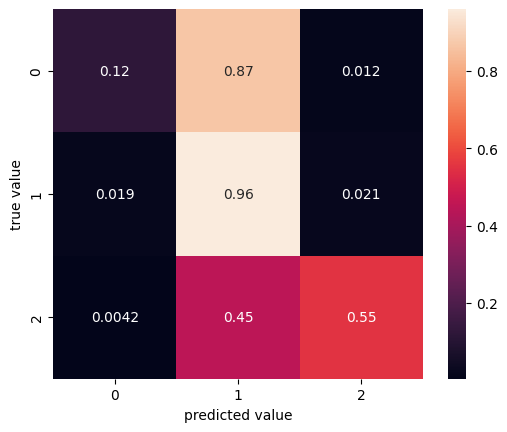

In [44]:
mat = confusion_matrix(y_test, y_model)
# normalized confusion matrix
normalized_mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(normalized_mat, square=True, annot=True, cbar=True)

plt.xlabel('predicted value')
plt.ylabel('true value')

In [22]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_model))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.12      0.20     35758
           1       0.81      0.96      0.88    198834
           2       0.80      0.55      0.65     33346

    accuracy                           0.80    267938
   macro avg       0.71      0.54      0.57    267938
weighted avg       0.77      0.80      0.76    267938



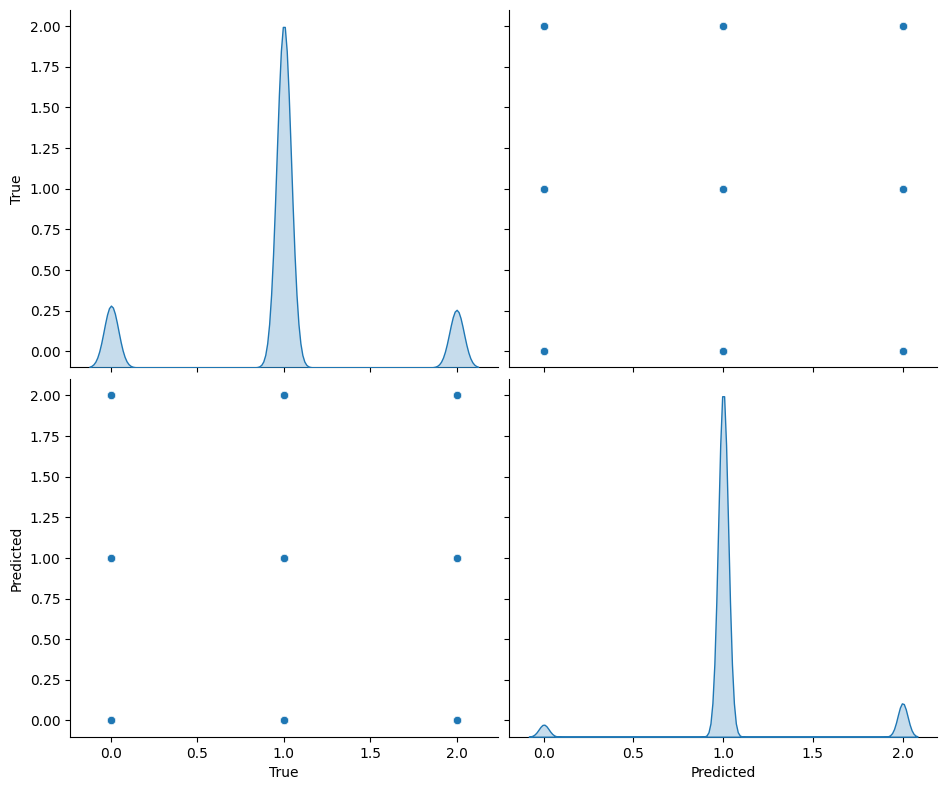

In [41]:
# Prepare a DataFrame with true and predicted values
pairplot_df = pd.DataFrame({'True': y_test, 'Predicted': y_model})

sns.pairplot(pairplot_df, height=4, aspect=1.2, diag_kind='kde')
plt.show()

## Logistic regression

In [18]:
# Classifier Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

In [23]:
# Extract features (X) and target variable (y)
X, y = (merged_df.drop(["Password","Strength"], axis=1), merged_df["Strength"])
print(X.shape)
print(y.shape)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

(669843, 120)
(669843,)


In [47]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Predict using the testing set
y_model_l = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_model_l)
print(f"Accuracy: {(accuracy*100).round(3)} %")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_model_l))

Accuracy: 81.983 %
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.30      0.39     35758
           1       0.84      0.94      0.89    198834
           2       0.82      0.69      0.75     33346

    accuracy                           0.82    267938
   macro avg       0.75      0.64      0.68    267938
weighted avg       0.80      0.82      0.80    267938



Text(77.92222222222227, 0.5, 'true value')

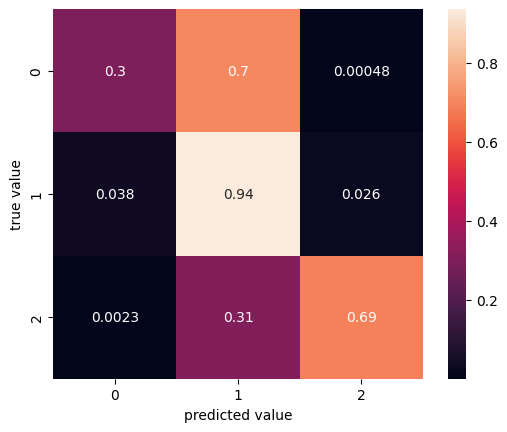

In [30]:
mat = confusion_matrix(y_test, y_model_l)
# normalized confusion matrix
normalized_mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(normalized_mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

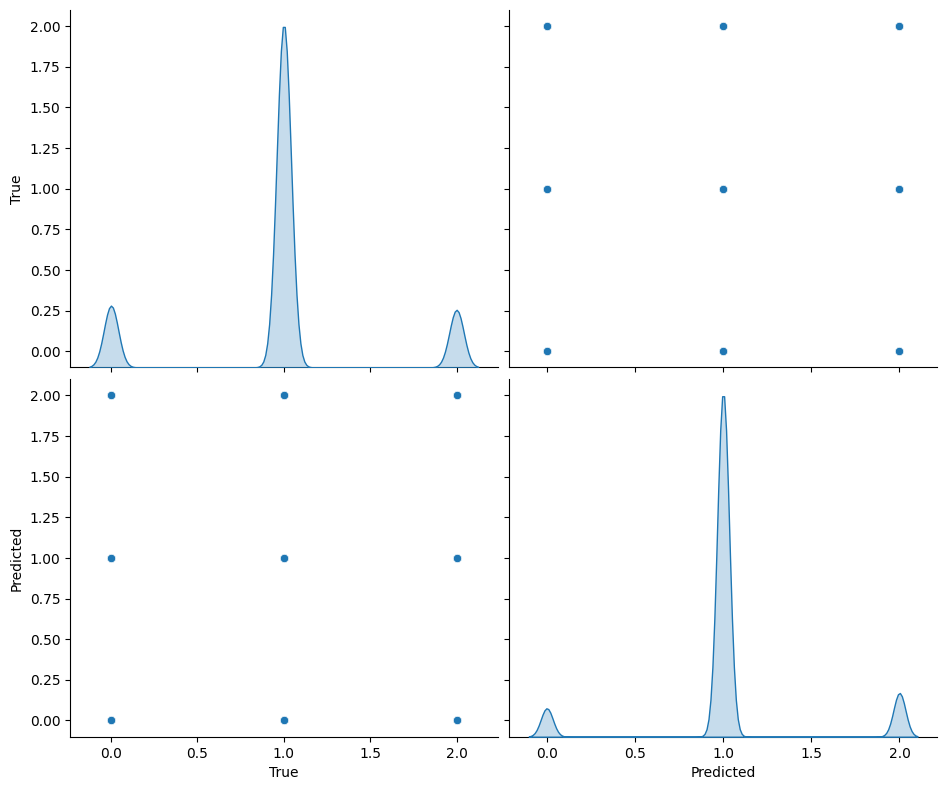

In [31]:
# Prepare a DataFrame with true and predicted values
pairplot_df = pd.DataFrame({'True': y_test, 'Predicted': y_model_l})

sns.pairplot(pairplot_df, height=4, aspect=1.2, diag_kind='kde')
plt.show()
